In [ ]:
#importing the required libraries

import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split


In [ ]:
#creating an one hot encoder for targetting the classes
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0- For Tumor
#1- For Normal

OneHotEncoder()

In [ ]:
# This cell gives the result list for images containing the tumor in the dataset

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Brain_Tumor_Dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())


In [ ]:
# This cell gives the result list for images that doesn't contain the tumor in the dataset

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain_Tumor_Dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
#data list for storing images data in the form of a numpy array

data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
#result list for storing one hot encoded form of target class whether its normal or tumor

result = np.array(result)
result = result.reshape(139,2)

In [ ]:
#splitting the data set into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#building a Convolutional Neural Network(CNN) Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        8256      
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))


Epoch 1/10
3/3 [==============================] - 2s 180ms/step - loss: 59.4389 - val_loss: 97.9547
Epoch 2/10
3/3 [==============================] - 0s 85ms/step - loss: 26.4766 - val_loss: 59.2419
Epoch 3/10
3/3 [==============================] - 0s 70ms/step - loss: 12.9724 - val_loss: 13.7100
Epoch 4/10
3/3 [==============================] - 0s 70ms/step - loss: 3.7069 - val_loss: 13.1397
Epoch 5/10
3/3 [==============================] - 0s 79ms/step - loss: 3.9657 - val_loss: 15.6480
Epoch 6/10
3/3 [==============================] - 0s 70ms/step - loss: 4.3260 - val_loss: 10.3700
Epoch 7/10
3/3 [==============================] - 0s 78ms/step - loss: 2.6679 - val_loss: 5.1769
Epoch 8/10
3/3 [==============================] - 0s 72ms/step - loss: 1.1948 - val_loss: 3.3287
Epoch 9/10
3/3 [==============================] - 0s 70ms/step - loss: 0.6527 - val_loss: 2.7276
Epoch 10/10
3/3 [==============================] - 0s 75ms/step - loss: 0.6276 - val_loss: 2.1992


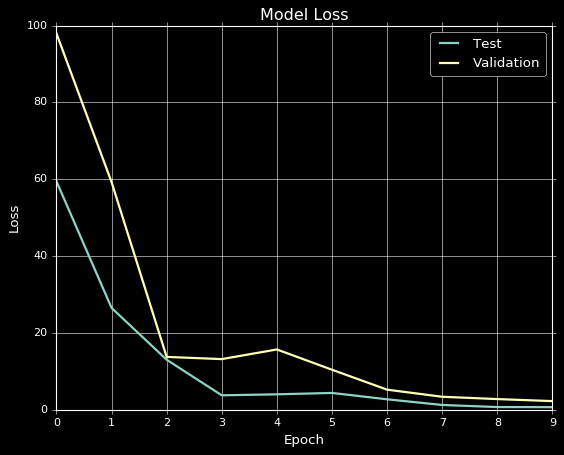

In [ ]:
#plotting the losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
    if number==0:
        return '\033[91mTUMOR DETECTED \u26A0️ YOU ARE IN DANGER\033[0m'
    else:
        return '\033[92mNO TUMOR DETECTED YOU ARE SAFE\033[0m'


NO TUMOR DETECTED YOU ARE SAFE


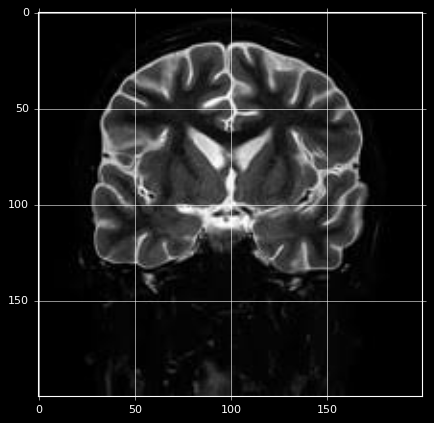

In [ ]:
#Testing the model

from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Dataset/no/19 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

TUMOR DETECTED ⚠️ YOU ARE IN DANGER


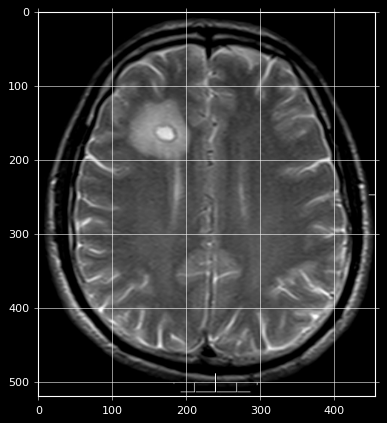

In [ ]:
#Testing the model

from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))